# Dependencies

In [8]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [9]:
train_dir = "/content/drive/MyDrive/Dataset_C/Train"
test_dir = "/content/drive/MyDrive/Dataset_C/Test"

In [7]:
data = keras.utils.image_dataset_from_directory(train_dir)

Found 3441 files belonging to 7 classes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
test = keras.utils.image_dataset_from_directory(test_dir)

Found 588 files belonging to 7 classes.


Scaling Data

In [12]:
data = data.map(lambda x, y: (x/255, y))

In [13]:
scaled_iterator = data.as_numpy_iterator()

In [68]:
batch = scaled_iterator.next()

In [62]:
class_names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Suprise']

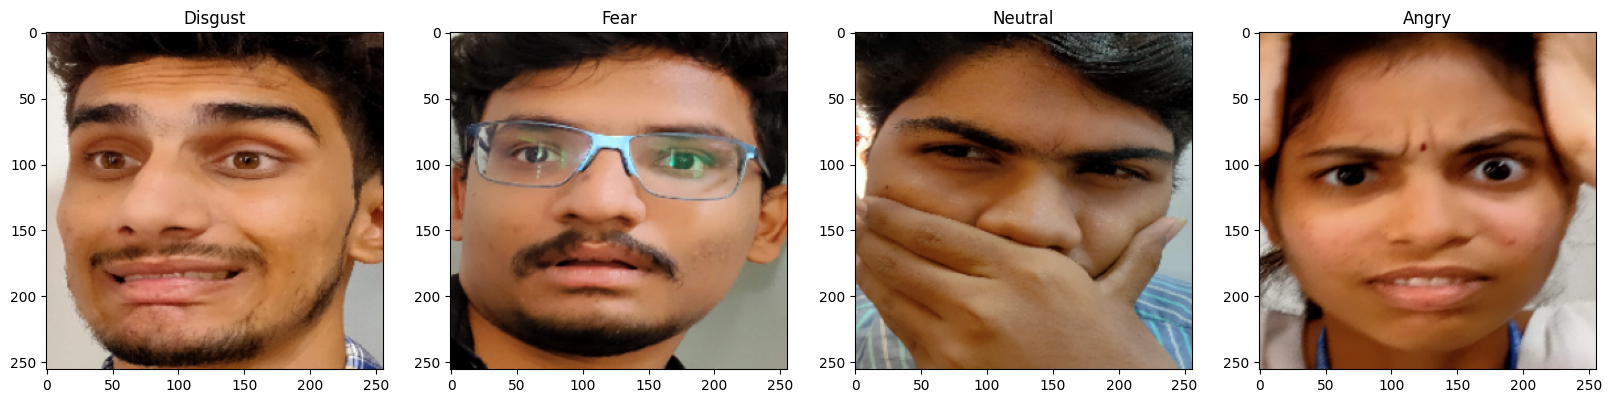

In [69]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(class_names[batch[1][idx]])

# Splitting Data

In [16]:
len(data)

108

In [17]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)+1
print(train_size)
print(val_size)

86
22


In [18]:
train_size+val_size

108

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [20]:
len(val)

22

In [21]:
len(train)

86

# Model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l2

Model = Sequential()

Model.add(Conv2D(64, (3,3), 1, activation = 'elu', input_shape = (256, 256, 3)))
Model.add(Conv2D(64, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.01)))
Model.add(Conv2D(64, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.01)))
Model.add(BatchNormalization())

Model.add(Conv2D(32, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.01)))
Model.add(Conv2D(32, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.1)))
Model.add(Conv2D(32, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())

Model.add(Conv2D(16, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.1)))
Model.add(Conv2D(16, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.1)))
Model.add(Conv2D(16, (3,3), 1, activation = 'elu', kernel_regularizer = l2(0.1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D())

Model.add(Flatten())
Model.add(Dense(256, activation = 'elu'))
Model.add(Dense(7, activation = 'softmax'))

In [23]:
Model.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 250, 250, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 248, 248, 32)      18464     
                                                                 
 conv2d_4 (Conv2D)           (None, 246, 246, 32)      9248      
                                                        

# Training Model

In [25]:
logdir = 'logs'

In [26]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir)

In [27]:
hist = Model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
86/86 [==============================] - 336s 4s/step - loss: 15.0830 - accuracy: 0.2445 - val_loss: 20.7779 - val_accuracy: 0.1829
Epoch 2/20
86/86 [==============================] - 65s 751ms/step - loss: 10.2559 - accuracy: 0.3634 - val_loss: 21.9273 - val_accuracy: 0.1887
Epoch 3/20
86/86 [==============================] - 69s 798ms/step - loss: 7.1206 - accuracy: 0.4677 - val_loss: 8.0425 - val_accuracy: 0.2250
Epoch 4/20
86/86 [==============================] - 69s 799ms/step - loss: 5.0090 - accuracy: 0.5592 - val_loss: 9.6917 - val_accuracy: 0.1916
Epoch 5/20
86/86 [==============================] - 70s 801ms/step - loss: 3.5391 - accuracy: 0.6650 - val_loss: 5.5750 - val_accuracy: 0.2409
Epoch 6/20
86/86 [==============================] - 67s 764ms/step - loss: 2.5020 - accuracy: 0.7424 - val_loss: 3.5142 - val_accuracy: 0.3440
Epoch 7/20
86/86 [==============================] - 69s 798ms/step - loss: 1.8106 - accuracy: 0.7998 - val_loss: 3.0931 - val_accuracy: 0.40

# Performance and testing

In [28]:
hist.history

{'loss': [15.083025932312012,
  10.255899429321289,
  7.120571613311768,
  5.009030818939209,
  3.539074182510376,
  2.50197696685791,
  1.810639500617981,
  1.3026312589645386,
  1.0326026678085327,
  0.8655077219009399,
  0.6925144791603088,
  0.5200093984603882,
  0.4503207504749298,
  0.4290239214897156,
  0.3624023199081421,
  0.2779834568500519,
  0.35897552967071533,
  0.8922536373138428,
  0.6739922165870667,
  0.433181494474411],
 'accuracy': [0.24454942345619202,
  0.3633720874786377,
  0.4676598906517029,
  0.5592296719551086,
  0.6649709343910217,
  0.7423691749572754,
  0.7997819781303406,
  0.8564680218696594,
  0.8691860437393188,
  0.8884447813034058,
  0.9138808250427246,
  0.9407703280448914,
  0.9389534592628479,
  0.9364098906517029,
  0.9480378031730652,
  0.9694767594337463,
  0.9371366500854492,
  0.8815407156944275,
  0.9247819781303406,
  0.9622092843055725],
 'val_loss': [20.777936935424805,
  21.92733383178711,
  8.042523384094238,
  9.691731452941895,
  5.57

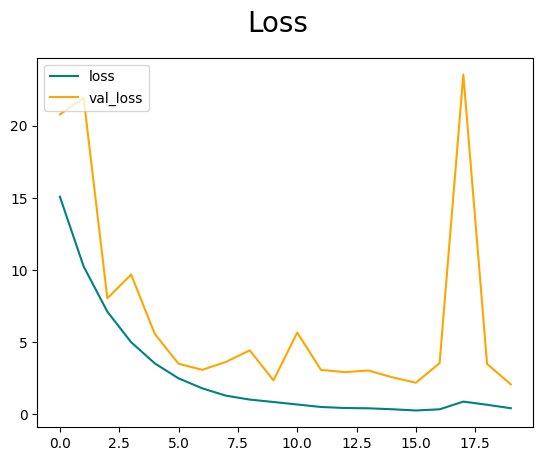

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

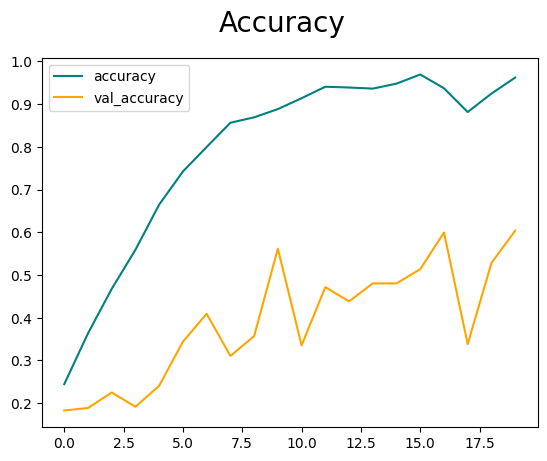

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [31]:
from keras.metrics import Precision, Recall, Accuracy

In [32]:
pre = Precision()
rec = Recall()
acc = Accuracy()

In [33]:
for batch in test.as_numpy_iterator():
  x, y = batch
  y_pred = Model.predict(x)
  y_pred = np.argmax(y_pred, axis = 1)
  pre.update_state(y, y_pred)
  rec.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 [==============================] - 4s 4s/step


In [34]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8605442047119141, Recall:1.0, Accuracy:0.12074829638004303


In [35]:
img = cv2.imread('/content/drive/MyDrive/Dataset_C/Train/Fear/image_0.png')
resize = tf.image.resize(img, (256, 256))

In [36]:
yhat = Model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 902ms/step


In [37]:
np.argmax(yhat, axis = 1)

array([2])

In [38]:
test_y = []
testhat_y = []

In [49]:
test_batch = next(iter(train))
images, labels = test_batch

predictions = Model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 41ms/step


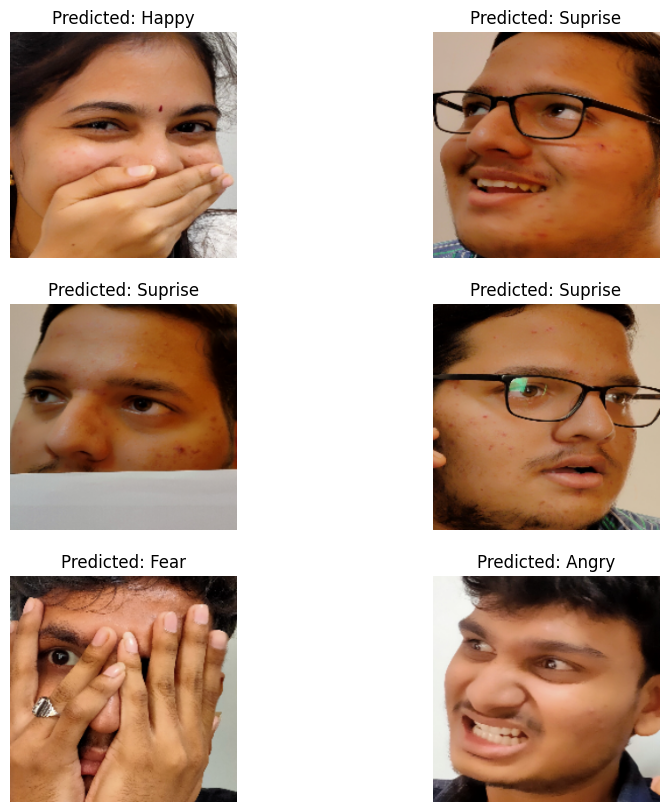

In [50]:
# Get class names
class_names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Suprise']

plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 2, i + 1)
    plt.imshow(images[i])
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")

plt.show()

In [59]:
from sklearn.metrics import confusion_matrix

for batch in test.as_numpy_iterator():
  x, y = batch
  y_pred = Model.predict(x)
  y = np.append(y,y)
  y_pred = np.argmax(y_pred, axis = 1)
  y_pred = np.append(y_pred,y_pred)
  conf = confusion_matrix(y, y_pred)

1/1 [==============================] - 0s 31ms/step


In [60]:
y_pred

array([6, 1, 1, 2, 0, 6, 1, 5, 5, 5, 4, 1, 5, 2, 5, 2, 0, 3, 6, 5, 3, 1,
       1, 6, 4, 4, 6, 3, 0, 6, 6, 2, 6, 1, 1, 2, 0, 6, 1, 5, 5, 5, 4, 1,
       5, 2, 5, 2, 0, 3, 6, 5, 3, 1, 1, 6, 4, 4, 6, 3, 0, 6, 6, 2])

<Axes: >

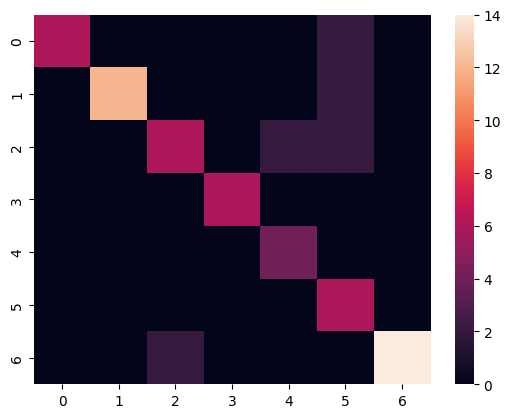

In [61]:
import seaborn as sns

sns.heatmap(conf)


# Saving and Loading a Model

In [54]:
from keras.models import load_model

In [55]:
Model.save('expression.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
# model = load_model('expression.h5')

In [57]:
# yhat_model = model.predict(np.expand_dims(img/255, 0))

In [58]:
# yhat_model